In [108]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

path_to_data = r'/Users/Guille/Desktop/caiso_power/data/processed/'

In [244]:
file_1 = 'multisource_SP15.pkl'
file_2 = 'singlesource_load.pkl'
file_3 = 'singlesource_solar.pkl'
file_4 = 'singlesource_wind.pkl'

with open(path_to_data + file_1, 'rb') as _handle:
    X1_ = pickle.load(_handle)

with open(path_to_data + file_2, 'rb') as _handle:
    X2_ = pickle.load(_handle)
    
with open(path_to_data + file_3, 'rb') as _handle:
    X3_ = pickle.load(_handle)
    
with open(path_to_data + file_4, 'rb') as _handle:
    X4_ = pickle.load(_handle)

In [245]:
print(X1_[0][0].shape, X1_[0][1].shape, X1_[1][0].shape, X1_[1][1].shape)
print(X2_[0][0].shape, X2_[0][1].shape, X2_[1][0].shape, X2_[1][1].shape)
print(X3_[0][0].shape, X3_[0][1].shape, X3_[1][0].shape, X3_[1][1].shape)
print(X4_[0][0].shape, X4_[0][1].shape, X4_[1][0].shape, X4_[1][1].shape)

(729, 17021, 24) (729, 3, 24) (243, 17021, 24) (243, 3, 24)
(729, 4496, 24) (729, 3, 24) (243, 4496, 24) (243, 3, 24)
(729, 4074, 24) (729, 3, 24) (243, 4074, 24) (243, 3, 24)
(729, 1122, 24) (729, 2, 24) (243, 1122, 24) (243, 2, 24)


In [246]:
# Loading spatial masks
def _load_spatial_masks(i_resources_, path, map_file_name   = r"USland_0.125_(-125,-112)_(32,43).pkl",
                                            masks_file_name = r"density_grid_0.125_(-125,-112)_(32,43).pkl"):
    # Load the index of US land in the NOAA operational forecast
    US_land_ = pd.read_pickle(path + map_file_name)
    # Load the index of Demand, Solar, and Wind land in the NOAA operational forecast
    D_den_, S_den_, W_den_ = pd.read_pickle(path + masks_file_name)
    # Define spatial feature masks
    F_ = np.zeros(US_land_.shape)
    for i_resource in i_resources_:
        F_ += [D_den_, S_den_, W_den_][i_resource]
    return [np.ones(US_land_.shape), US_land_, D_den_ + S_den_ + W_den_, F_]


labels_ = ['Atmospheric Pressure', 'Direct Irradiance', 'Diffuse Irradiance', 
           'Dew Point', 'Relative Humidity', 'Temperature',
           'Wind Speed (10m)', 'Wind Speed (60m)', 'Wind Speed (80m)', 
           'Wind Speed (100m)', 'Wind Speed (120m)', 'Discomfort Index', 
           'Wind Chill', 'Heating and Cooling Degree Hours', 'Clear-Sky Irradiance']

    
path_to_aux = r'/Users/Guille/Desktop/caiso_power/data/auxiliary/'

# Loading spatial masks
M1_ = _load_spatial_masks([0, 1, 2], path_to_aux)
print(M1_[0].shape, M1_[1].shape, M1_[2].shape, M1_[3].shape)


# Get Grid Dimensions

mask_  = M1_[3]
idx_   = M1_[3] > 0
N_grid = idx_.sum()
print(N_grid)
print(X1_[1][0].shape)
b_       = np.stack([X1_[1][0][:, i*N_grid:(i + 1)*N_grid, :] for i in range(11)])
print(b_.shape)
print(X1_[1][0].shape, X1_[1][1].shape)

X1_p_ = X1_[1][0][:, 11*N_grid:, :]
print(X1_p_.shape)

(9152,) (9152,) (9152,) (9152,)
1540
(243, 17021, 24)
(11, 243, 1540, 24)
(243, 17021, 24) (243, 3, 24)
(243, 81, 24)


[ 9172.       8879.       8771.       8801.       9060.       9678.
 10329.      10655.      10892.      10555.      10556.      10248.
  9958.       9976.      10061.      10169.      10330.      10785.
   -12.3136    -12.39877   -12.02462   -12.36394   -12.87141   -13.66969]
24.0 54


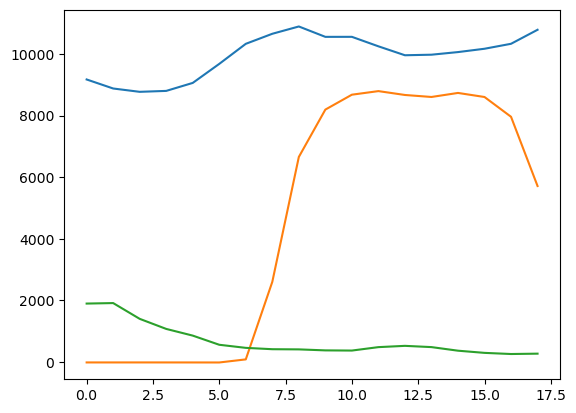

(18,)


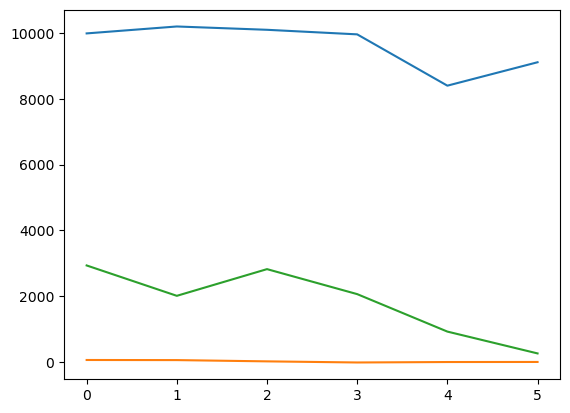

In [247]:
print(X1_p_[0, :24, 22])
print(X1_p_[0, :-9, 22].shape[0]/3, 3*18)

plt.figure()
plt.plot(X1_p_[0, :18, 6])
plt.plot(X1_p_[0, 18:2*18, 6])
plt.plot(X1_p_[0, 2*18:3*18, 6])
plt.show()

print(X1_p_[0, 54:-9, 6].shape)
plt.figure()
plt.plot(X1_p_[0, 54:60, 6])
plt.plot(X1_p_[0, 60:66, 6])
plt.plot(X1_p_[0, 66:72, 6])
plt.show()

[ 2.02200000e+03  1.00000000e+00  8.06052991e-01  9.90234580e-01
  8.53553391e-01  0.00000000e+00 -1.00000000e+00  1.00000000e+00
  1.00000000e+00]
[ 2.02200000e+03  1.00000000e+00  4.24286111e-01  9.95838660e-01
  8.53553391e-01  9.50484434e-01 -1.00000000e+00  1.00000000e+00
 -1.00000000e+00]
[ 2.02200000e+03  1.00000000e+00  2.35517995e-01  9.97760686e-01
  8.53553391e-01  1.88255099e-01  1.00000000e+00  1.00000000e+00
 -1.00000000e+00]
[ 2.02200000e+03  1.00000000e+00  8.96182794e-02  9.99092767e-01
  8.53553391e-01  1.88255099e-01 -1.00000000e+00  1.00000000e+00
 -1.00000000e+00]
[ 2.02200000e+03  1.00000000e+00  1.02350294e-02  9.99833324e-01
  8.53553391e-01  9.50484434e-01 -1.00000000e+00  1.00000000e+00
 -1.00000000e+00]
[ 2.02200000e+03  9.33012702e-01  4.05210942e-02  9.99981480e-01
  8.53553391e-01  6.11260467e-01  1.00000000e+00  1.00000000e+00
 -1.00000000e+00]


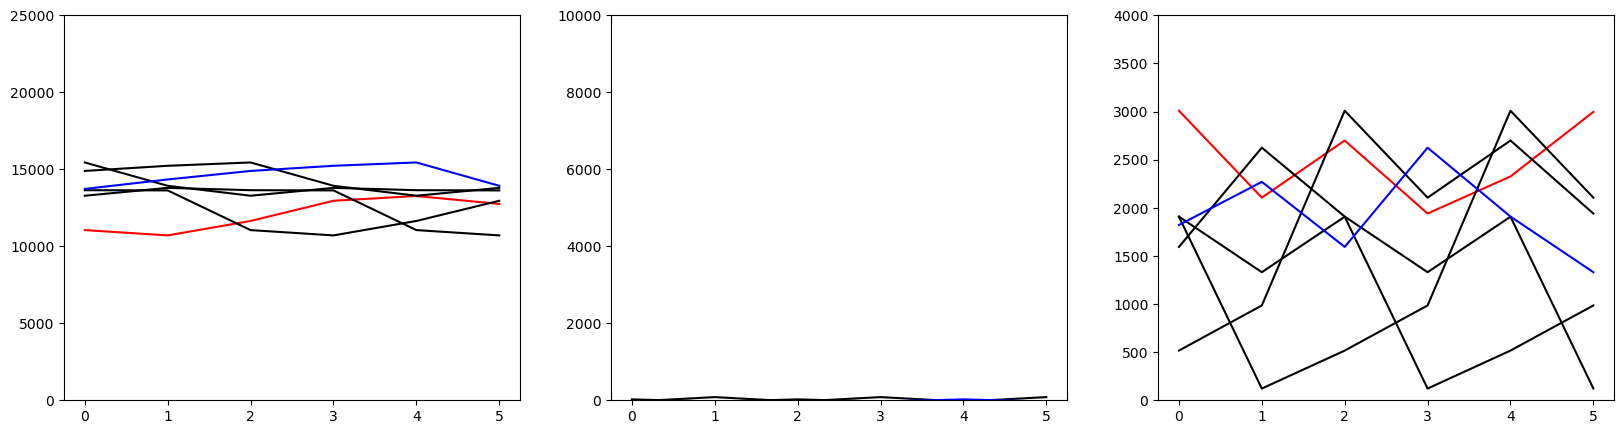

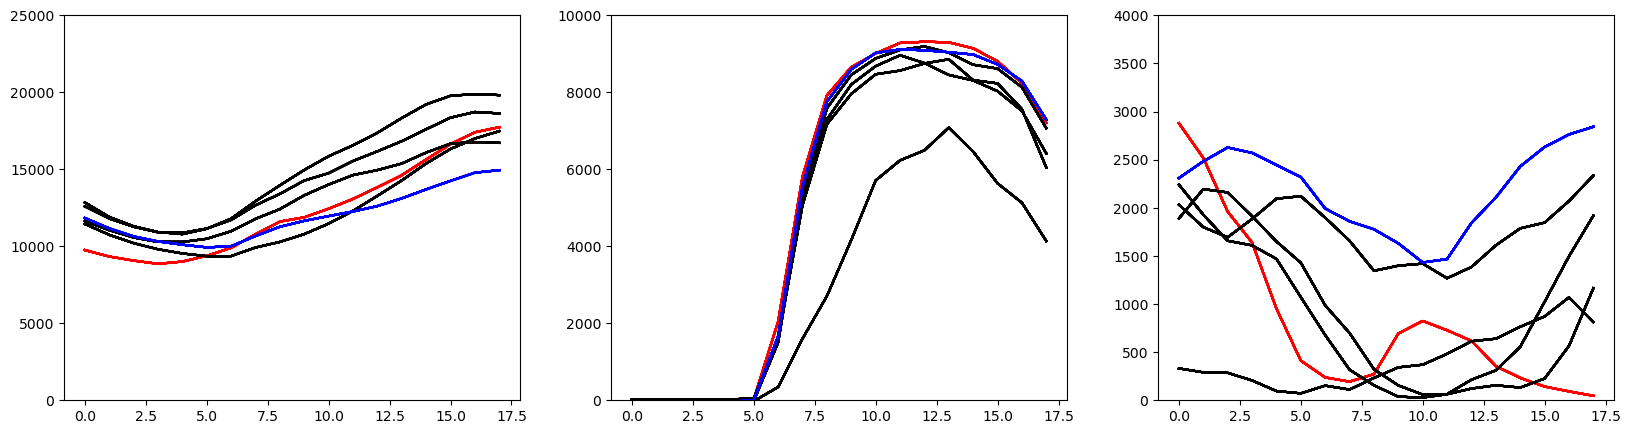

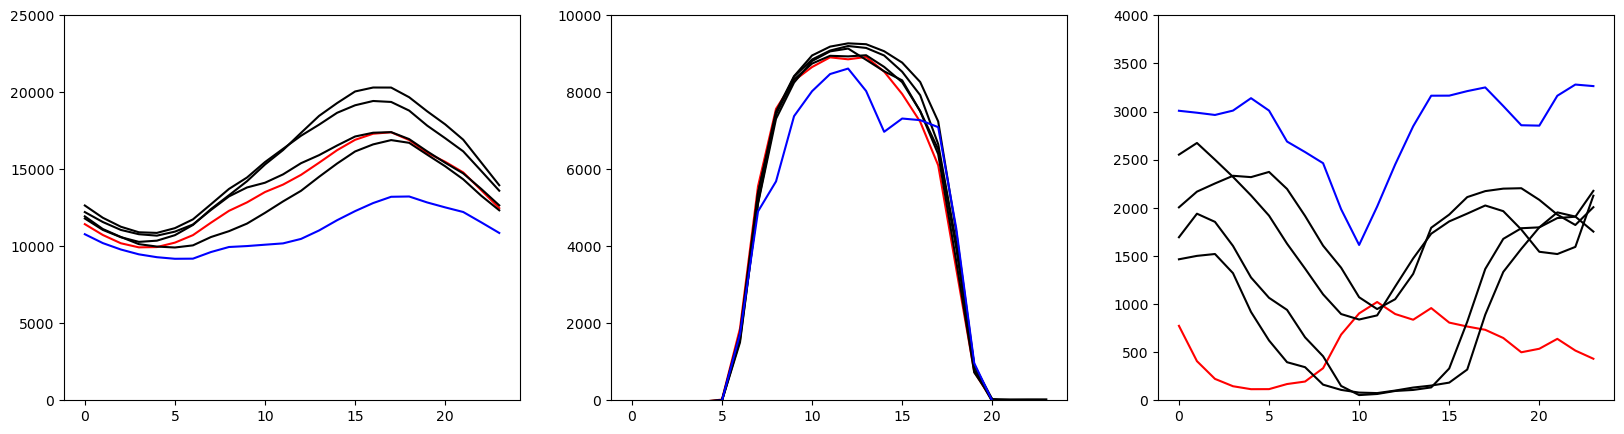

Direct Irradiance


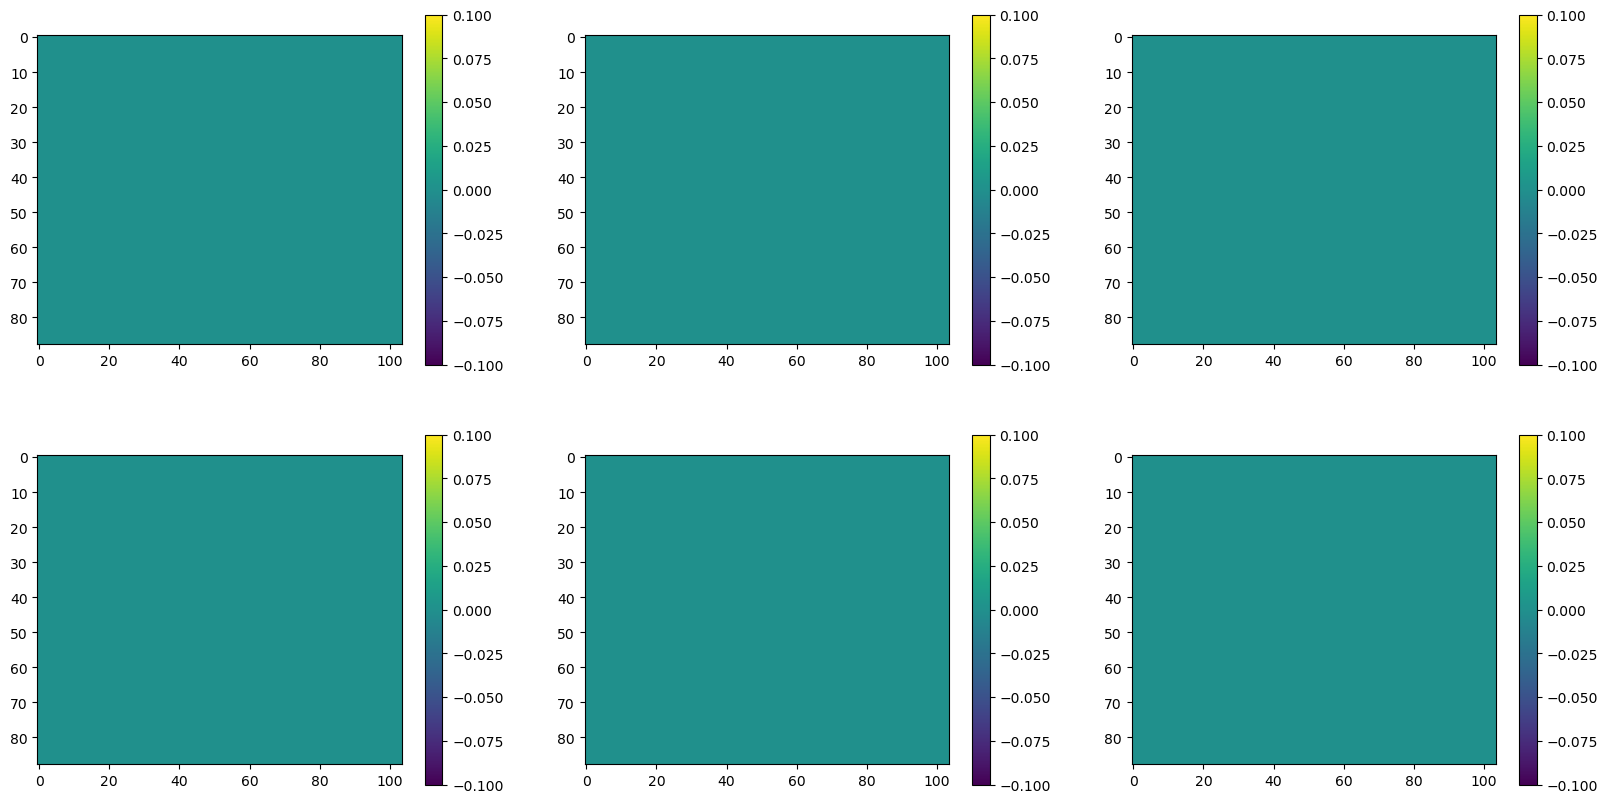

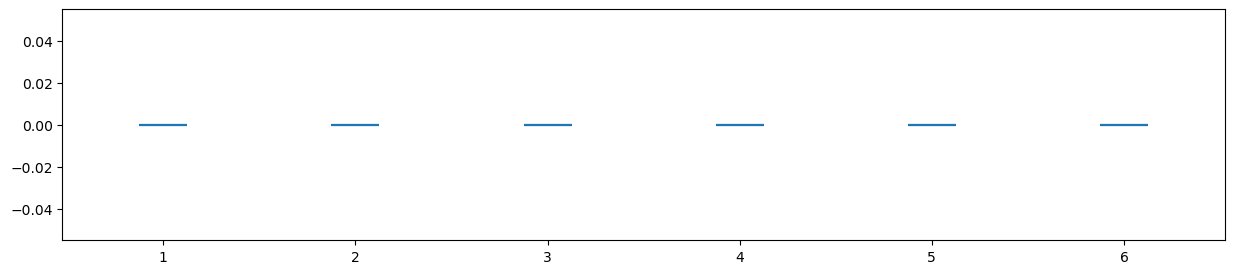

Diffuse Irradiance


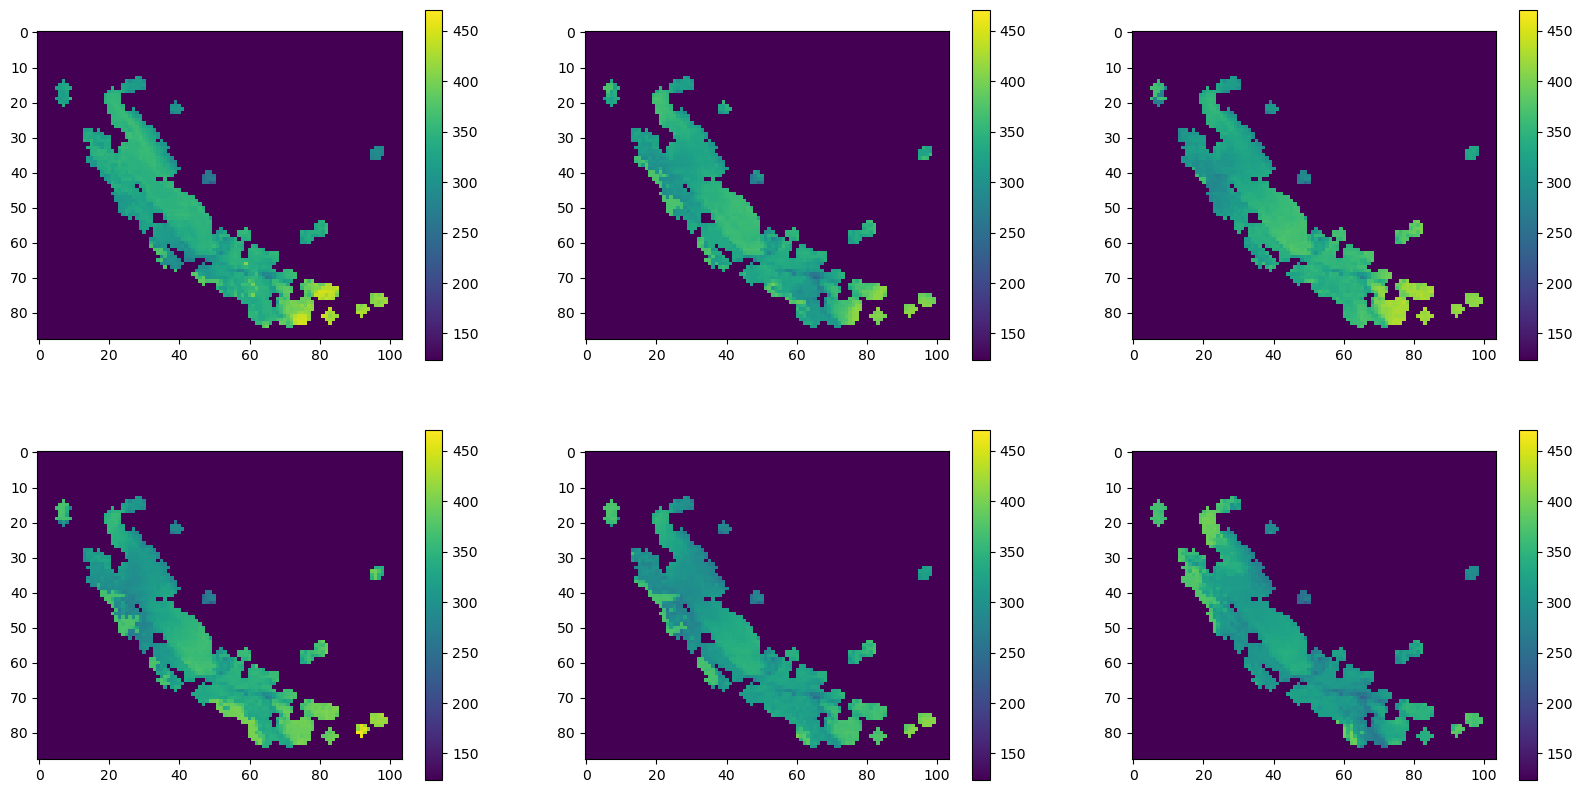

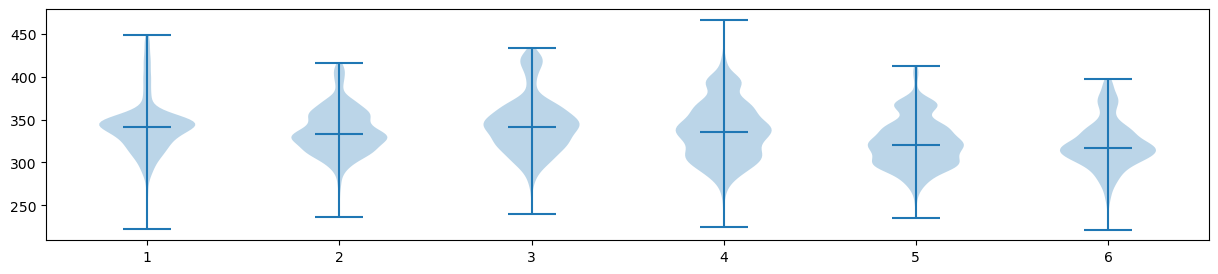

Dew Point


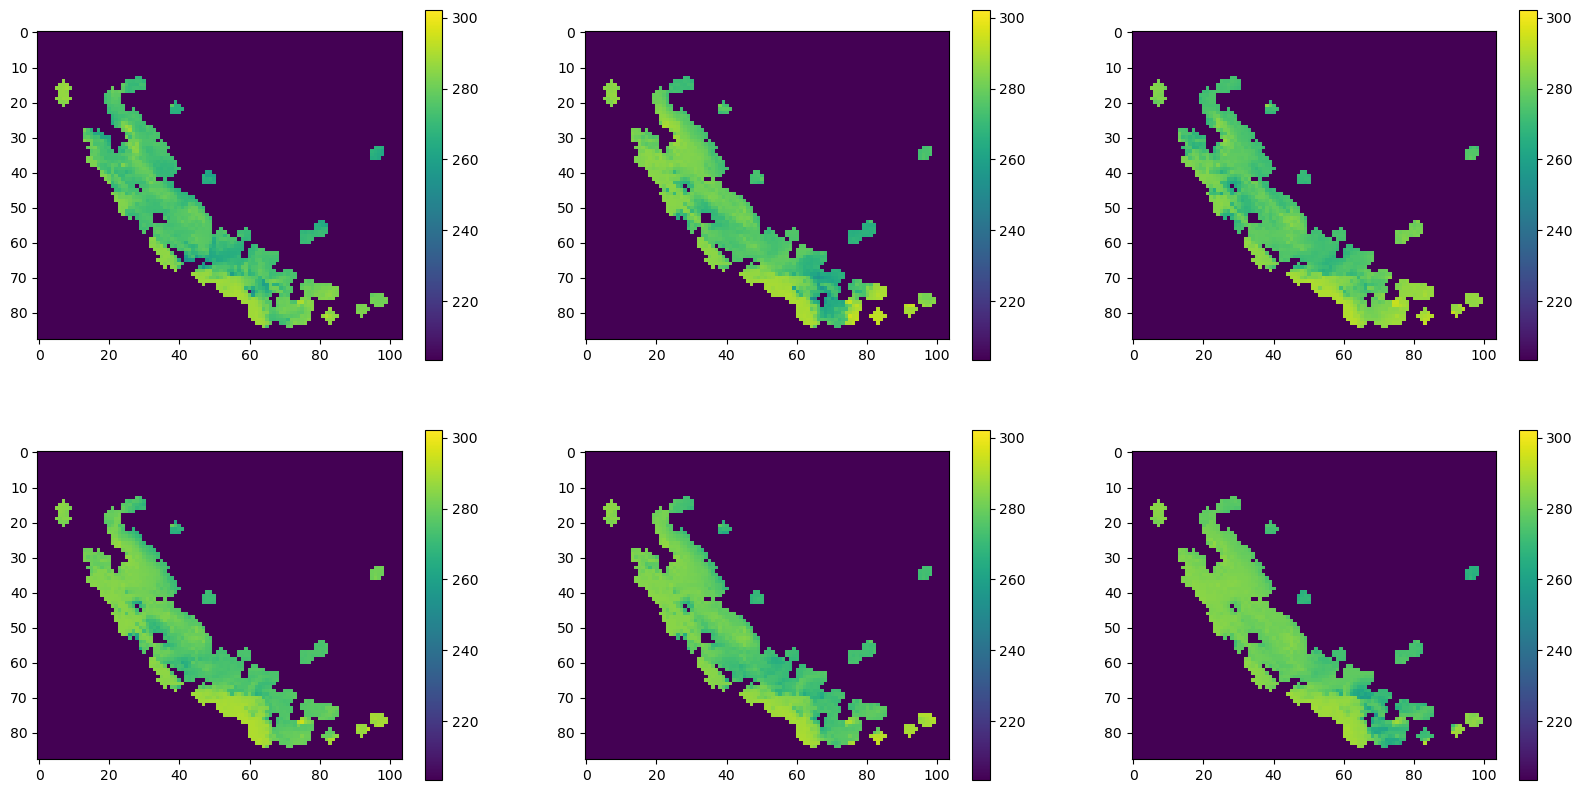

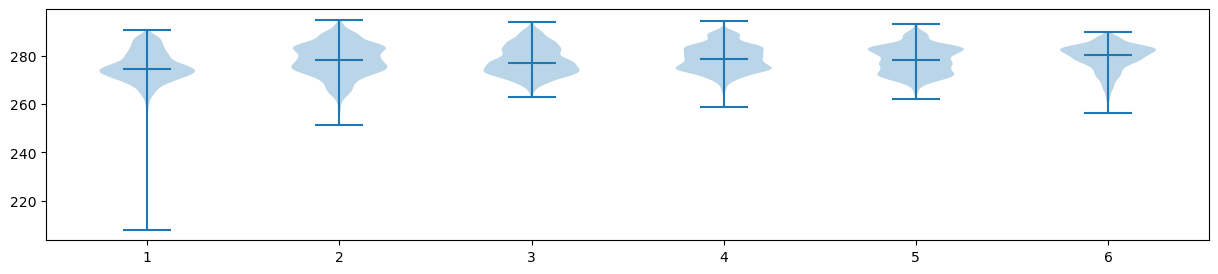

Relative Humidity


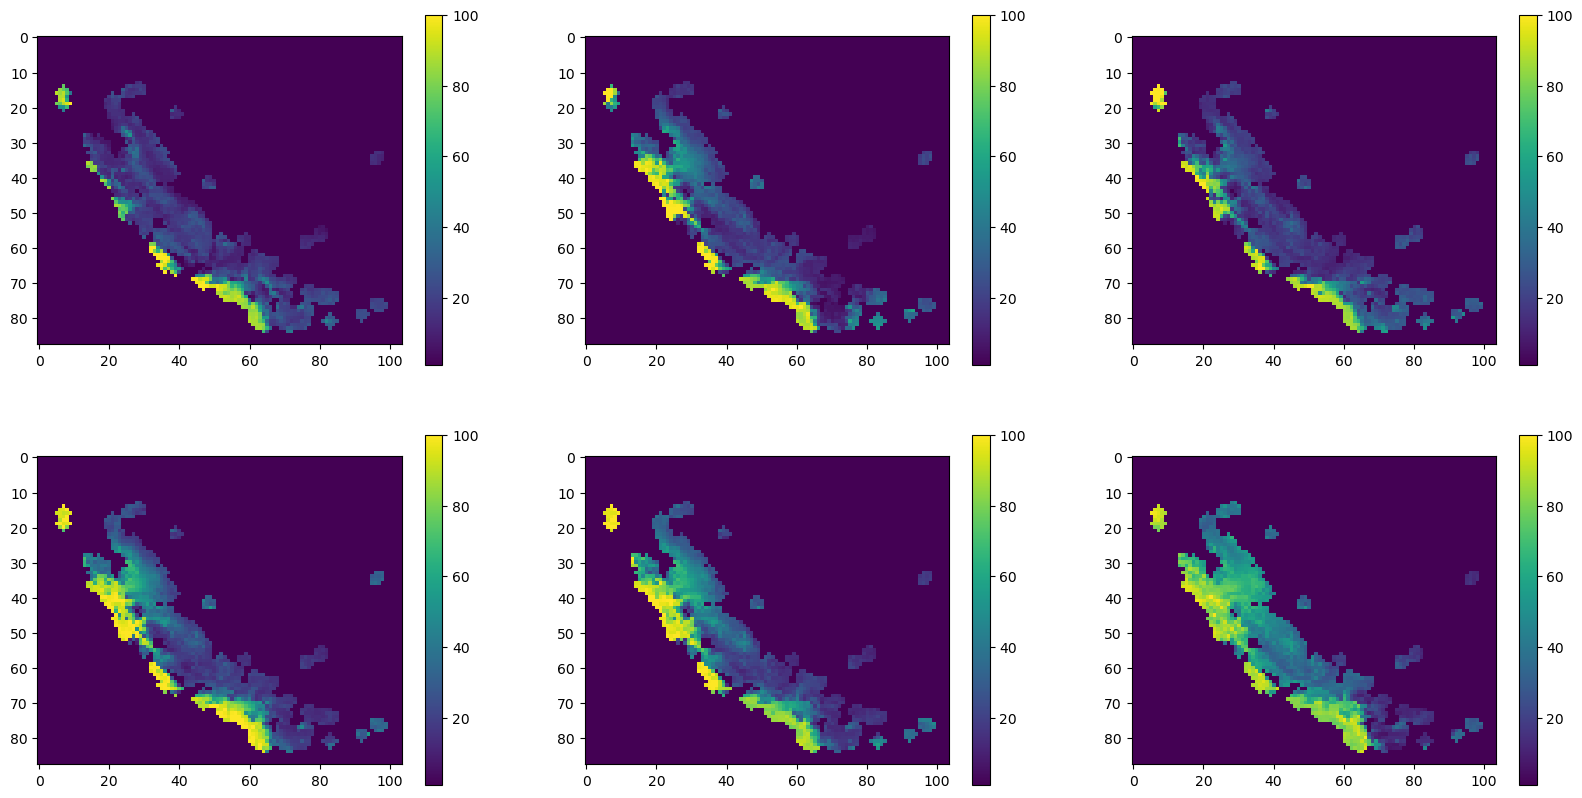

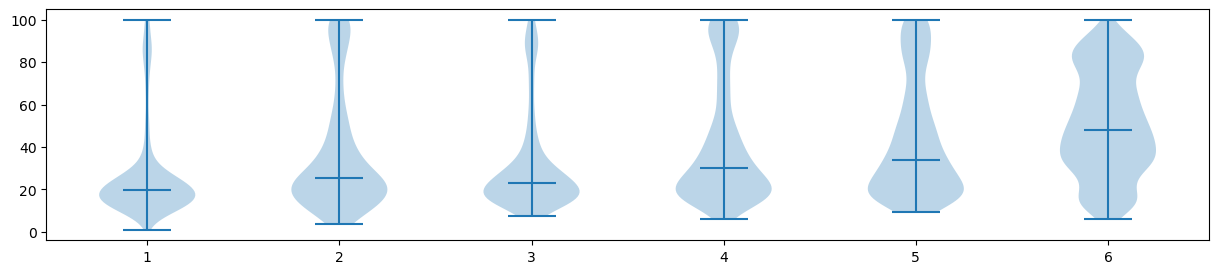

Temperature


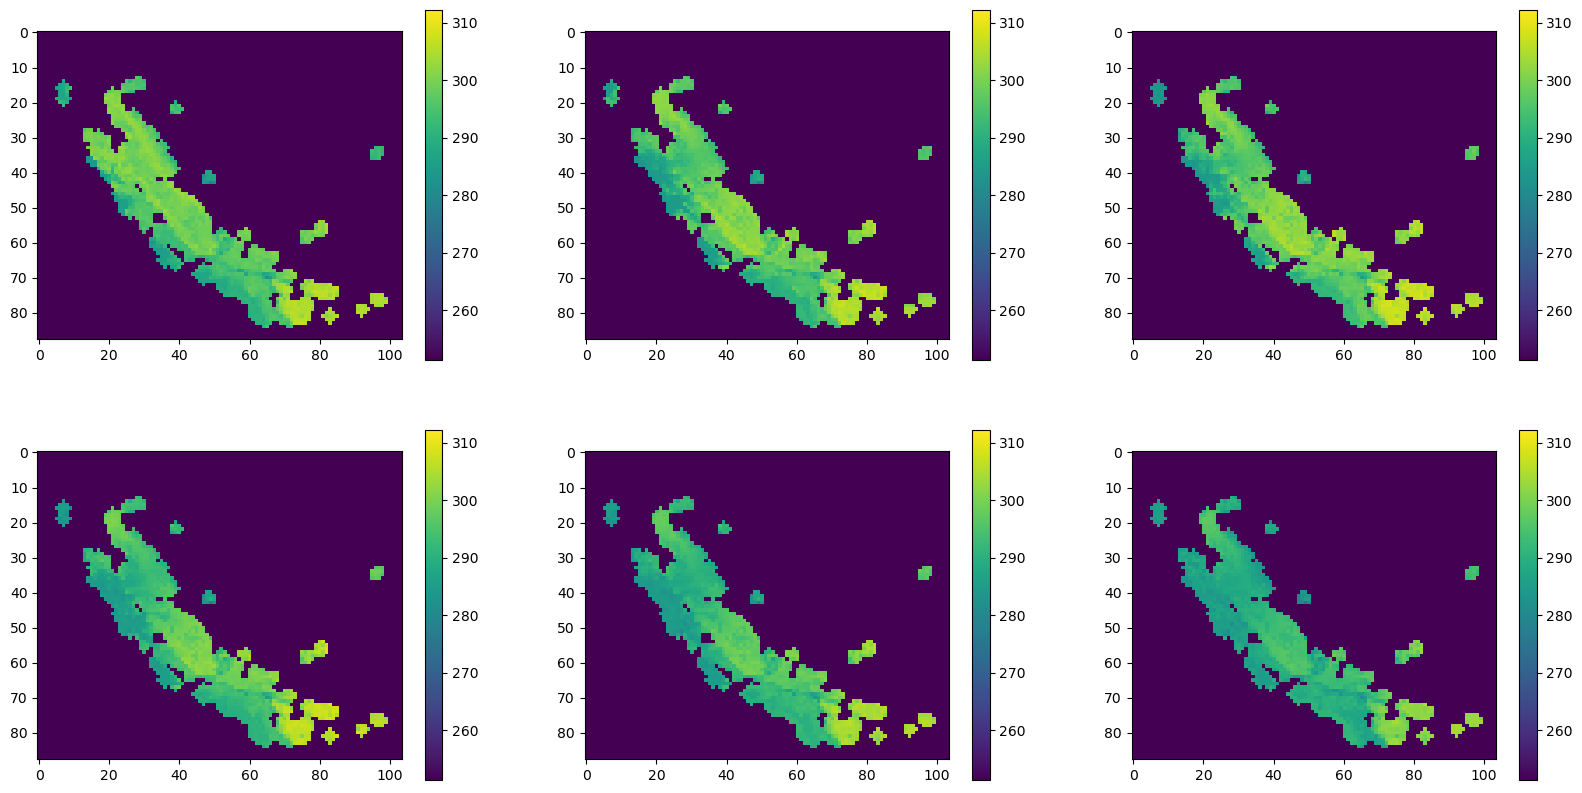

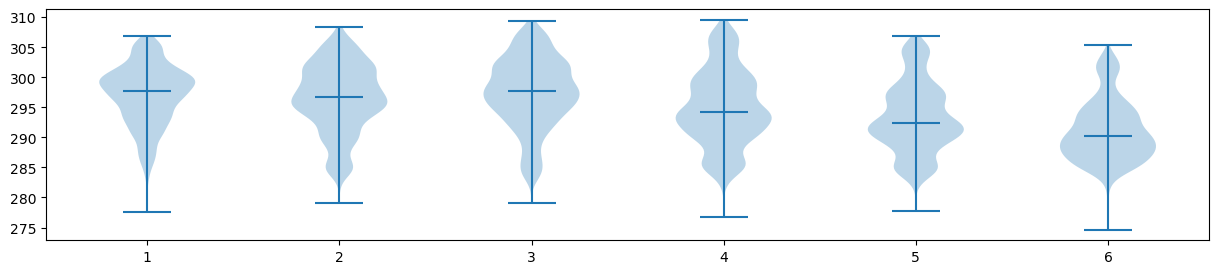

Wind Speed (60m)


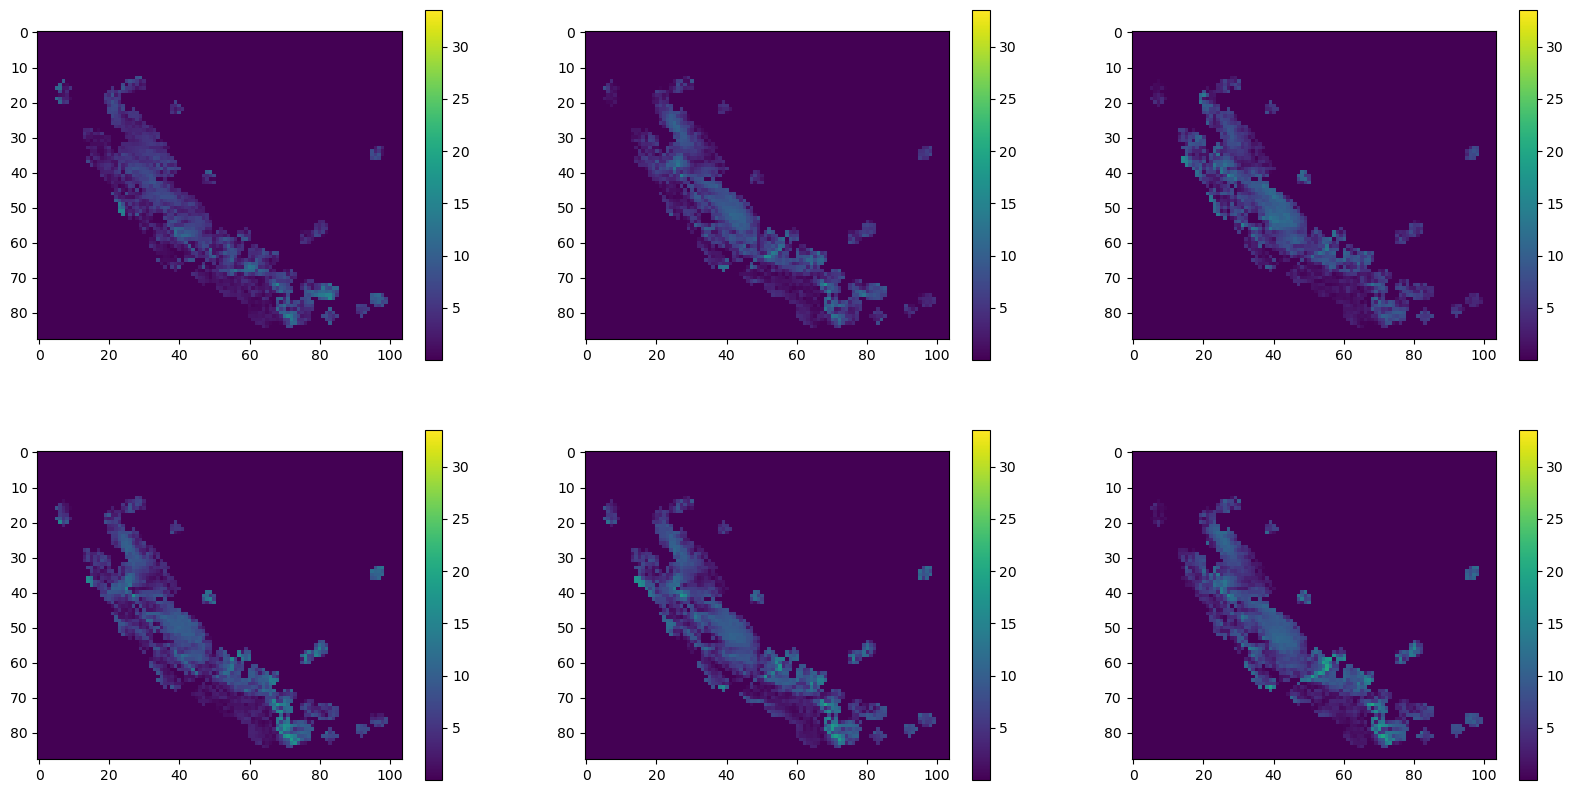

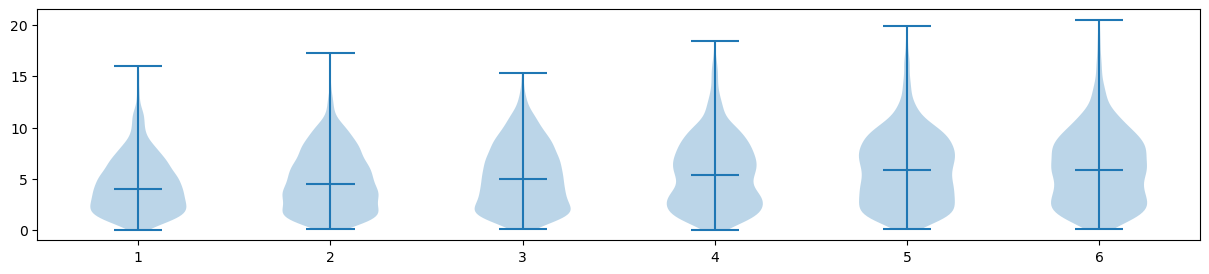

Wind Speed (80m)


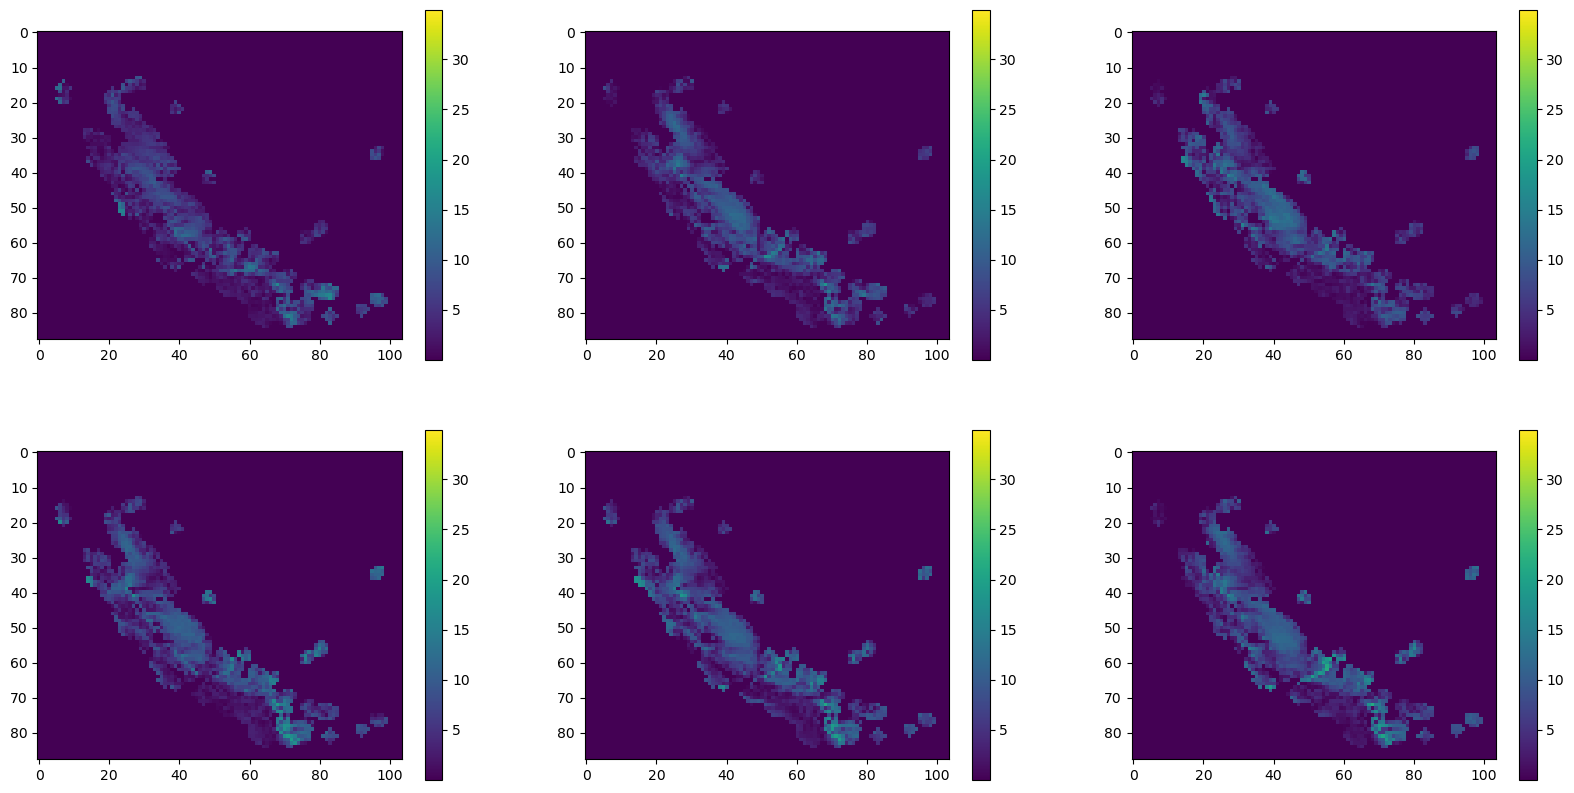

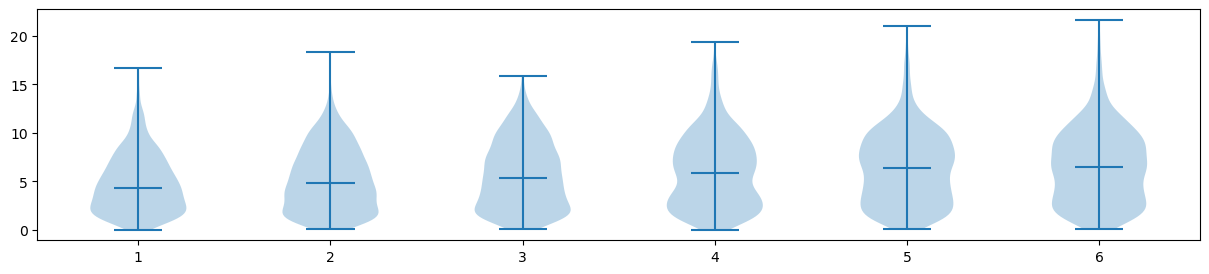

Wind Speed (100m)


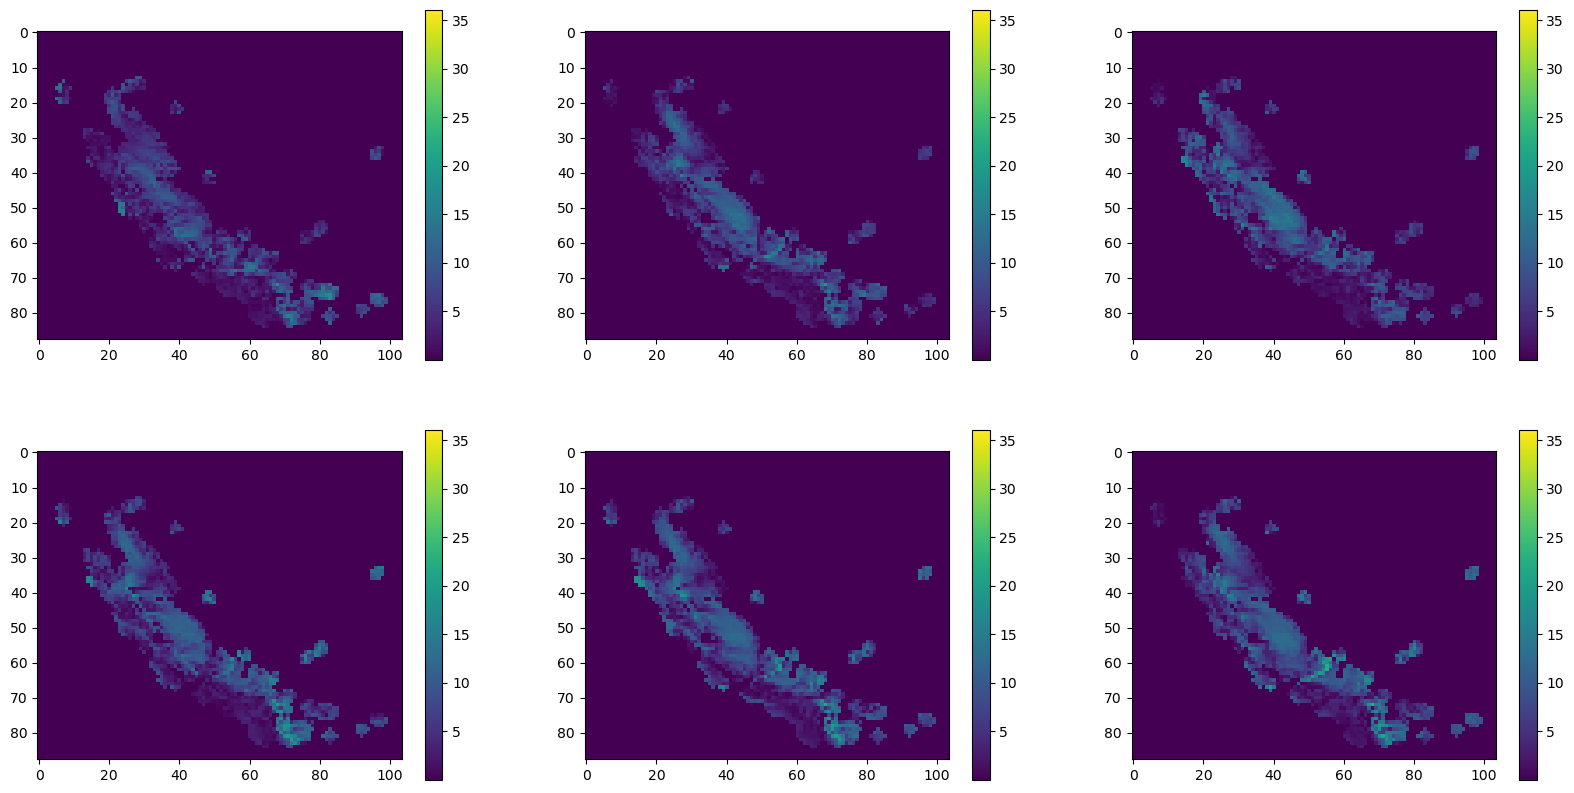

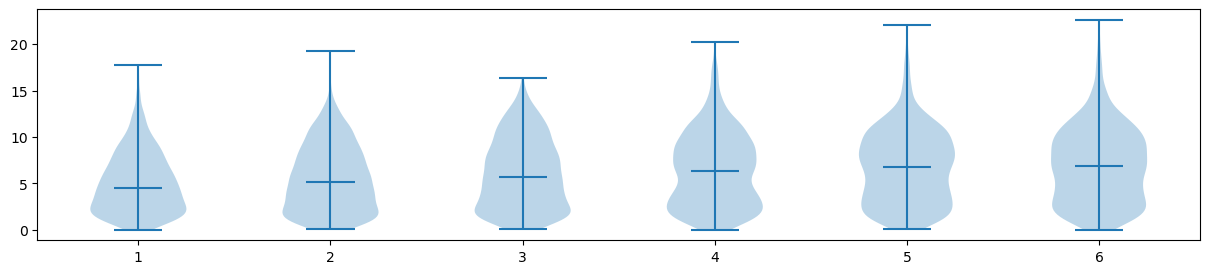

Wind Speed (120m)


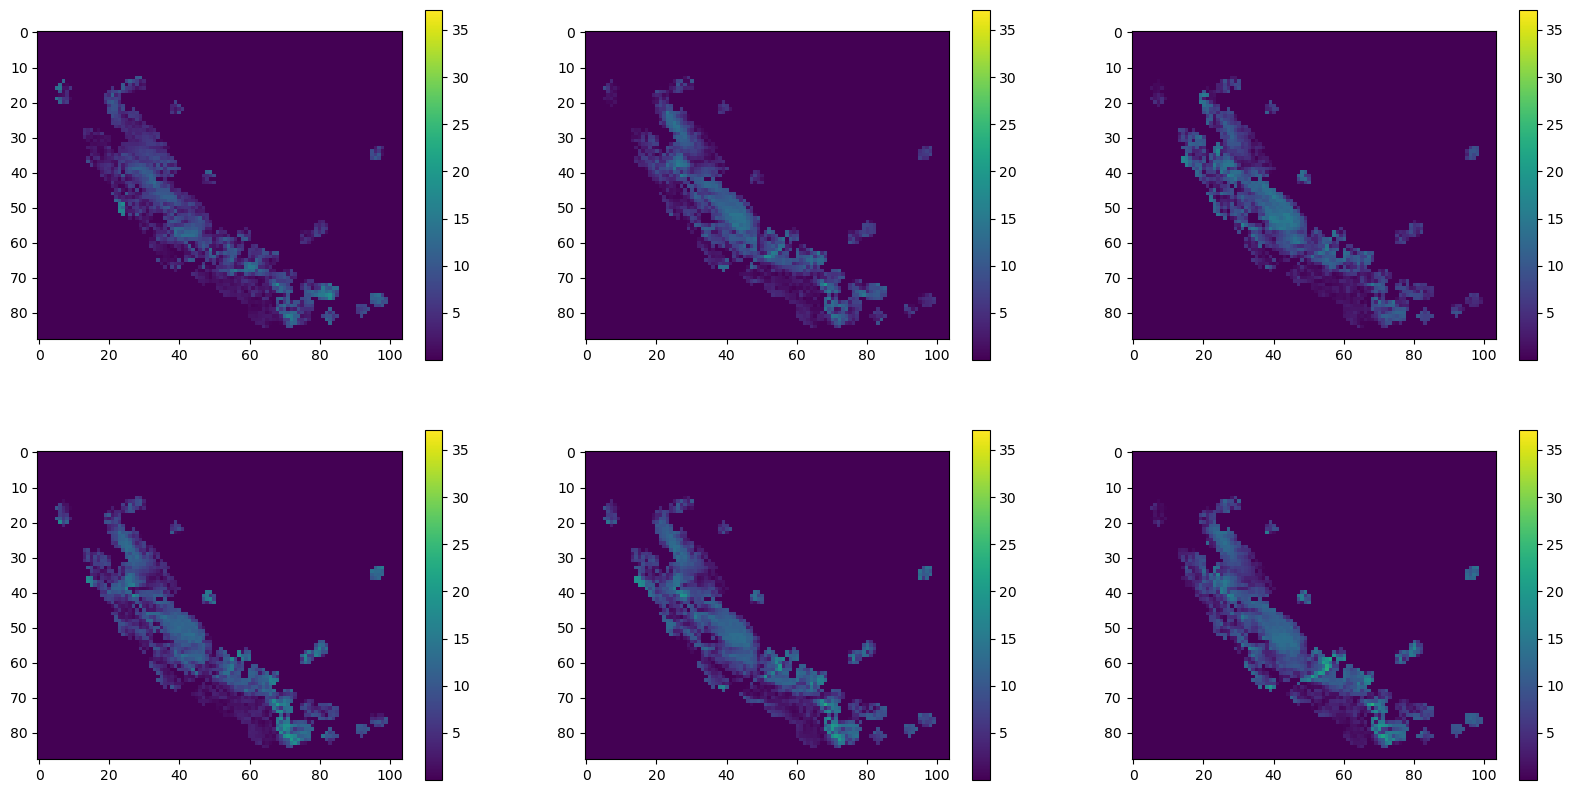

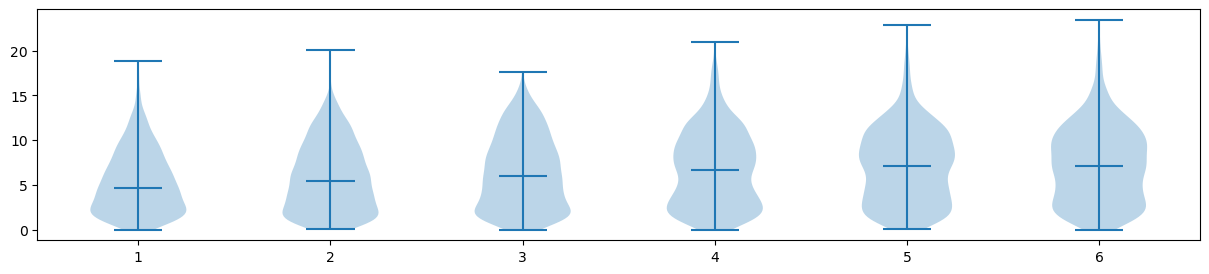

Discomfort Index


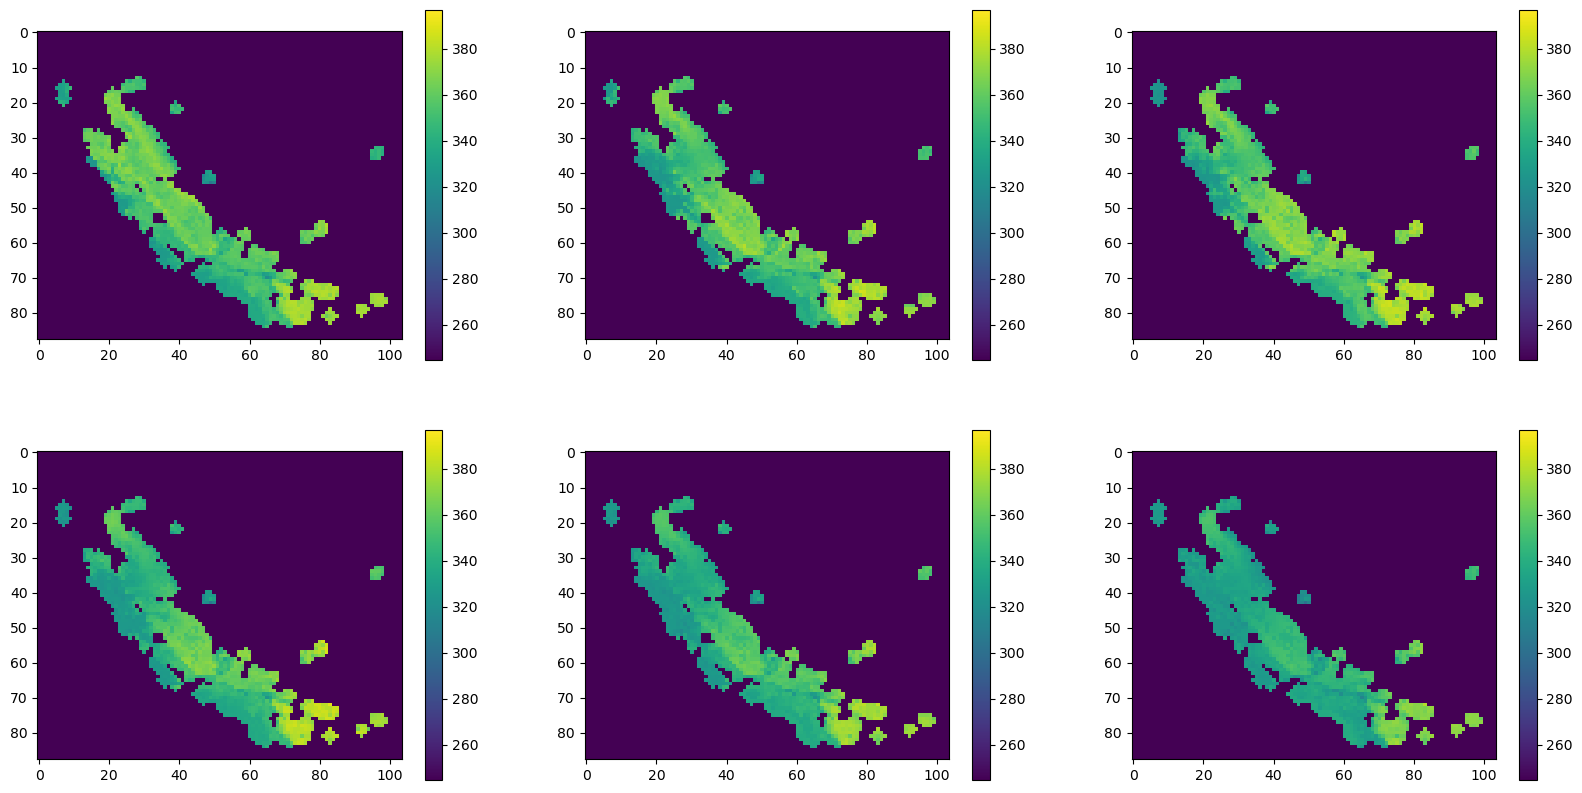

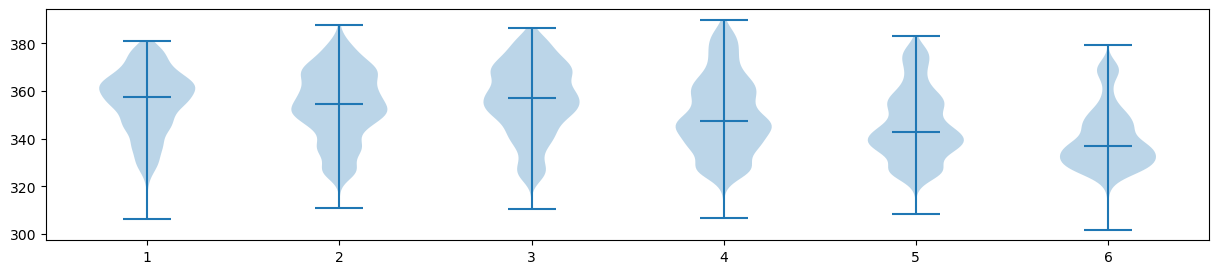

Clear-Sky Irradiance


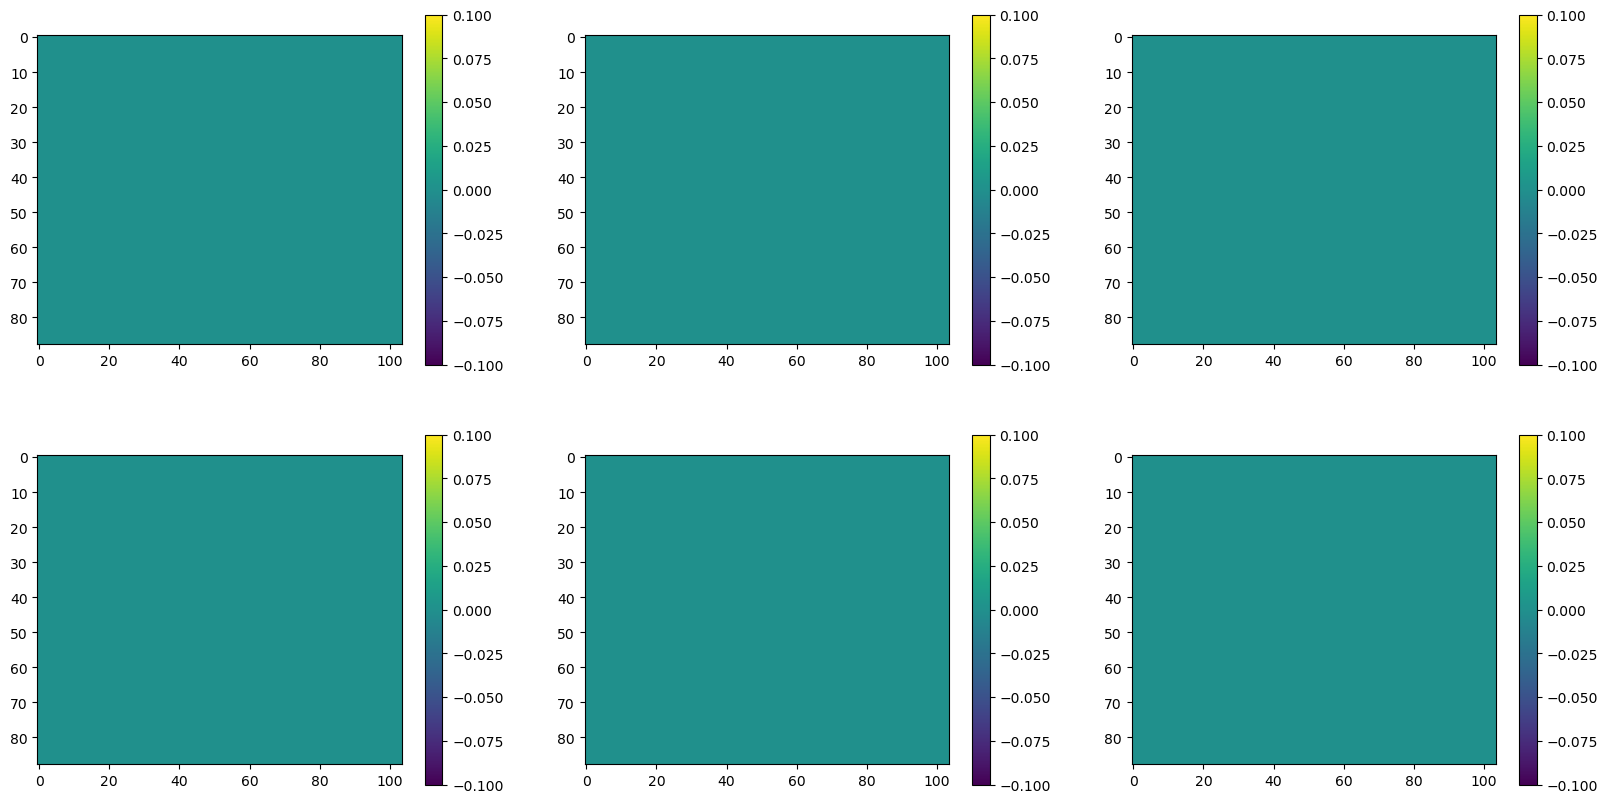

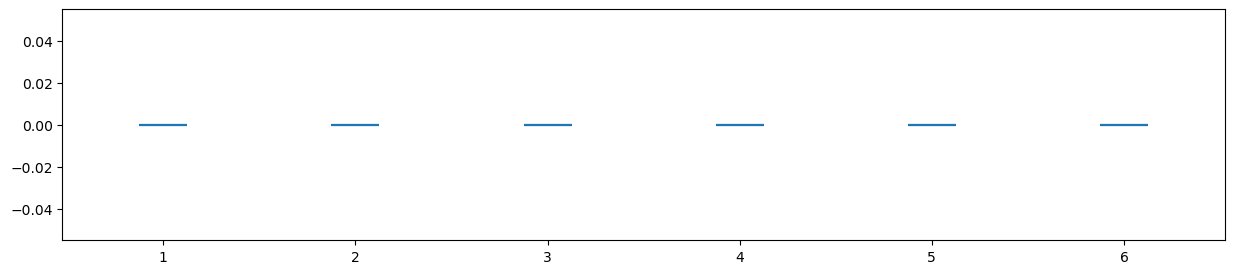

In [261]:
N = 104
M = 88

i = 1
k = 22

idx_samples_ = [80, 82, 84, 86, 88, 90]

# plt.figure(figsize = (20, 5))
# plt.plot(X1_p_[idx_samples_[0], -9:, k], 'r')
# plt.plot(X1_p_[idx_samples_[1], -9:, k], 'k')
# plt.plot(X1_p_[idx_samples_[2], -9:, k], 'k')
# plt.plot(X1_p_[idx_samples_[3], -9:, k], 'k')
# plt.plot(X1_p_[idx_samples_[4], -9:, k], 'k')
# plt.plot(X1_p_[idx_samples_[5], -9:, k], 'b')
# plt.show()

print(X1_p_[idx_samples_[0], -9:, k])
print(X1_p_[idx_samples_[1], -9:, k])
print(X1_p_[idx_samples_[2], -9:, k])
print(X1_p_[idx_samples_[3], -9:, k])
print(X1_p_[idx_samples_[4], -9:, k])
print(X1_p_[idx_samples_[5], -9:, k])

fig, ax_ = plt.subplots(1, 3, figsize = (20, 5))
ax_[0].plot(X1_p_[idx_samples_[0], 54:60, k], 'r')
ax_[0].plot(X1_p_[idx_samples_[1], 54:60, k], 'k')
ax_[0].plot(X1_p_[idx_samples_[2], 54:60, k], 'k')
ax_[0].plot(X1_p_[idx_samples_[3], 54:60, k], 'k')
ax_[0].plot(X1_p_[idx_samples_[4], 54:60, k], 'k')
ax_[0].plot(X1_p_[idx_samples_[5], 54:60, k], 'b')
ax_[0].set_ylim(0, 25000)

ax_[1].plot(X1_p_[idx_samples_[0], 60:66, k], 'r')
ax_[1].plot(X1_p_[idx_samples_[1], 60:66, k], 'k')
ax_[1].plot(X1_p_[idx_samples_[2], 60:66, k], 'k')
ax_[1].plot(X1_p_[idx_samples_[3], 60:66, k], 'k')
ax_[1].plot(X1_p_[idx_samples_[4], 60:66, k], 'k')
ax_[1].plot(X1_p_[idx_samples_[5], 60:66, k], 'b')
#ax_[1, 0].plot(X1_[1][1][180, 1, :], 'b')
ax_[1].set_ylim(0, 10000)

ax_[2].plot(X1_p_[idx_samples_[0], 66:72, k], 'r')
ax_[2].plot(X1_p_[idx_samples_[1], 66:72, k], 'k')
ax_[2].plot(X1_p_[idx_samples_[2], 66:72, k], 'k')
ax_[2].plot(X1_p_[idx_samples_[3], 66:72, k], 'k')
ax_[2].plot(X1_p_[idx_samples_[4], 66:72, k], 'k')
ax_[2].plot(X1_p_[idx_samples_[5], 66:72, k], 'b')
#plt.plot(X1_[1][1][180, 2, :], 'b')
ax_[2].set_ylim(0, 4000)

plt.show()

fig, ax_ = plt.subplots(1, 3, figsize = (20, 5))
ax_[0].plot(X1_p_[idx_samples_[0], :18, :], 'r')
ax_[0].plot(X1_p_[idx_samples_[1], :18, :], 'k')
ax_[0].plot(X1_p_[idx_samples_[2], :18, :], 'k')
ax_[0].plot(X1_p_[idx_samples_[3], :18, :], 'k')
ax_[0].plot(X1_p_[idx_samples_[4], :18, :], 'k')
ax_[0].plot(X1_p_[idx_samples_[5], :18, :], 'b')
#plt.plot(X1_[1][1][180, 0, :], 'b')
ax_[0].set_ylim(0, 25000)

ax_[1].plot(X1_p_[idx_samples_[0], 18:2*18, :], 'r')
ax_[1].plot(X1_p_[idx_samples_[1], 18:2*18, :], 'k')
ax_[1].plot(X1_p_[idx_samples_[2], 18:2*18, :], 'k')
ax_[1].plot(X1_p_[idx_samples_[3], 18:2*18, :], 'k')
ax_[1].plot(X1_p_[idx_samples_[4], 18:2*18, :], 'k')
ax_[1].plot(X1_p_[idx_samples_[5], 18:2*18, :], 'b')
#ax_[1, 0].plot(X1_[1][1][180, 1, :], 'b')
ax_[1].set_ylim(0, 10000)

ax_[2].plot(X1_p_[idx_samples_[0], 2*18:3*18, :], 'r')
ax_[2].plot(X1_p_[idx_samples_[1], 2*18:3*18, :], 'k')
ax_[2].plot(X1_p_[idx_samples_[2], 2*18:3*18, :], 'k')
ax_[2].plot(X1_p_[idx_samples_[3], 2*18:3*18, :], 'k')
ax_[2].plot(X1_p_[idx_samples_[4], 2*18:3*18, :], 'k')
ax_[2].plot(X1_p_[idx_samples_[5], 2*18:3*18, :], 'b')
#plt.plot(X1_[1][1][180, 2, :], 'b')
ax_[2].set_ylim(0, 4000)
plt.show()

fig, ax_ = plt.subplots(1, 3, figsize = (20, 5))
ax_[0].plot(X1_[1][1][idx_samples_[0], 0, :], 'r')
ax_[0].plot(X1_[1][1][idx_samples_[1], 0, :], 'k')
ax_[0].plot(X1_[1][1][idx_samples_[2], 0, :], 'k')
ax_[0].plot(X1_[1][1][idx_samples_[3], 0, :], 'k')
ax_[0].plot(X1_[1][1][idx_samples_[4], 0, :], 'k')
ax_[0].plot(X1_[1][1][idx_samples_[5], 0, :], 'b')
#plt.plot(X1_[1][1][180, 0, :], 'b')
ax_[0].set_ylim(0, 25000)

ax_[1].plot(X1_[1][1][idx_samples_[0], 1, :], 'r')
ax_[1].plot(X1_[1][1][idx_samples_[1], 1, :], 'k')
ax_[1].plot(X1_[1][1][idx_samples_[2], 1, :], 'k')
ax_[1].plot(X1_[1][1][idx_samples_[3], 1, :], 'k')
ax_[1].plot(X1_[1][1][idx_samples_[4], 1, :], 'k')
ax_[1].plot(X1_[1][1][idx_samples_[5], 1, :], 'b')
ax_[1].set_ylim(0, 10000)
#ax_[1, 0].plot(X1_[1][1][180, 1, :], 'b')

ax_[2].plot(X1_[1][1][idx_samples_[0], 2, :], 'r')
ax_[2].plot(X1_[1][1][idx_samples_[1], 2, :], 'k')
ax_[2].plot(X1_[1][1][idx_samples_[2], 2, :], 'k')
ax_[2].plot(X1_[1][1][idx_samples_[3], 2, :], 'k')
ax_[2].plot(X1_[1][1][idx_samples_[4], 2, :], 'k')
ax_[2].plot(X1_[1][1][idx_samples_[5], 2, :], 'b')
#plt.plot(X1_[1][1][180, 2, :], 'b')
ax_[2].set_ylim(0, 4000)

plt.show()

    
for i in range(11):

    features_idx_ = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 14]

    vmin = b_[i, :, :, k].min()
    vmax = b_[i, :, :, k].max()

    print(labels_[features_idx_[i]])
    all_data_ = []
    fig, ax_ = plt.subplots(2, 3, figsize = (20, 10))

    j              = idx_samples_[0]
    feature_       = np.zeros(mask_.shape)
    feature_[idx_] = b_[i, j, :, k]
    all_data_.append(b_[i, j, :, k])
    y = X1_[1][1][j, ...]

    im = ax_[0, 0].imshow(feature_.reshape(M, N)[::-1,], interpolation = 'None', vmin = vmin, vmax = vmax)
    plt.colorbar(im, ax = ax_[0, 0])

    j              = idx_samples_[1]
    feature_       = np.zeros(mask_.shape)
    feature_[idx_] = b_[i, j, :, k]
    all_data_.append(b_[i, j, :, k])

    im = ax_[0, 1].imshow(feature_.reshape(M, N)[::-1,], interpolation = 'None', vmin = vmin, vmax = vmax)
    plt.colorbar(im, ax = ax_[0, 1])

    j              = idx_samples_[2]
    feature_       = np.zeros(mask_.shape)
    feature_[idx_] = b_[i, j, :, k]
    all_data_.append(b_[i, j, :, k])

    im = ax_[0, 2].imshow(feature_.reshape(M, N)[::-1,], interpolation = 'None', vmin = vmin, vmax = vmax)
    plt.colorbar(im, ax = ax_[0, 2])

    j              = idx_samples_[3]
    feature_       = np.zeros(mask_.shape)
    feature_[idx_] = b_[i, j, :, k]
    all_data_.append(b_[i, j, :, k])

    im = ax_[1, 0].imshow(feature_.reshape(M, N)[::-1,], interpolation = 'None', vmin = vmin, vmax = vmax)
    plt.colorbar(im, ax = ax_[1, 0])

    j              = idx_samples_[4]
    feature_       = np.zeros(mask_.shape)
    feature_[idx_] = b_[i, j, :, k]
    all_data_.append(b_[i, j, :, k])

    im = ax_[1, 1].imshow(feature_.reshape(M, N)[::-1,], interpolation = 'None', vmin = vmin, vmax = vmax)
    plt.colorbar(im, ax = ax_[1, 1])

    j              = idx_samples_[5]
    feature_       = np.zeros(mask_.shape)
    feature_[idx_] = b_[i, j, :, k]
    all_data_.append(b_[i, j, :, k])

    im = ax_[1, 2].imshow(feature_.reshape(M, N)[::-1,], interpolation = 'None', vmin = vmin, vmax = vmax)
    plt.colorbar(im, ax = ax_[1, 2])

    plt.show()

    plt.figure(figsize = (15, 3))
    # plot violin plot
    plt.violinplot(all_data_,
                      showmeans=False,
                      showmedians=True)
    plt.show()

In [ ]:


plt.figure()
plt.plot(X1_[1][0][70, 1600:3000, j].T)
#plt.plot(X1_[1][0][i, :-100, 18].T)
plt.plot(X1_[1][0][i, 1600:3000, j].T)
plt.show()

plt.figure()
plt.plot(X1_[1][0][70, :-100, j].T)
#plt.plot(X2_[1][0][i, :-100, 18].T)
plt.plot(X1_[1][0][i, :-100, j].T)
plt.show()

plt.figure()
plt.plot(X3_[1][0][70, :-100, j].T)
#plt.plot(X3_[1][0][i, :-100, 18].T)
plt.plot(X3_[1][0][i, :-100, j].T)
plt.show()

plt.figure()
plt.plot(X4_[1][0][70, :-100, j].T)
#plt.plot(X3_[1][0][i, :-100, 18].T)
plt.plot(X4_[1][0][i, :-100, j].T)
plt.show()

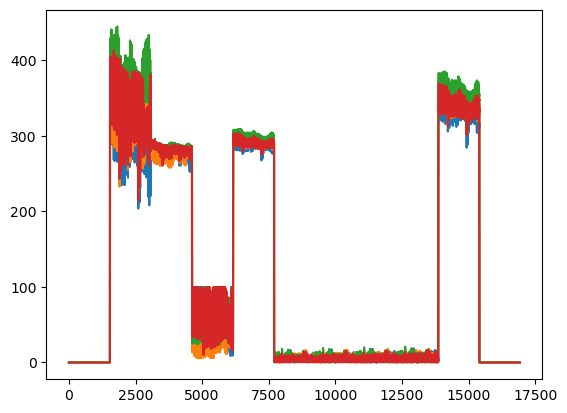

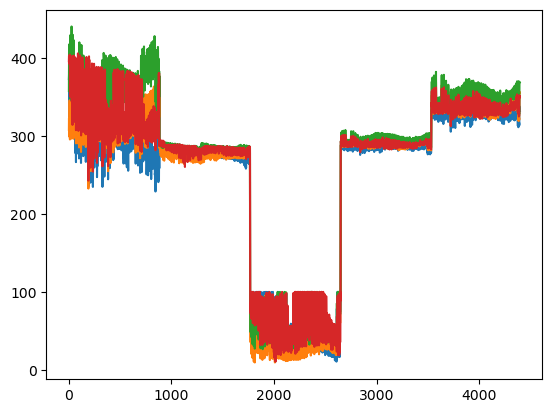

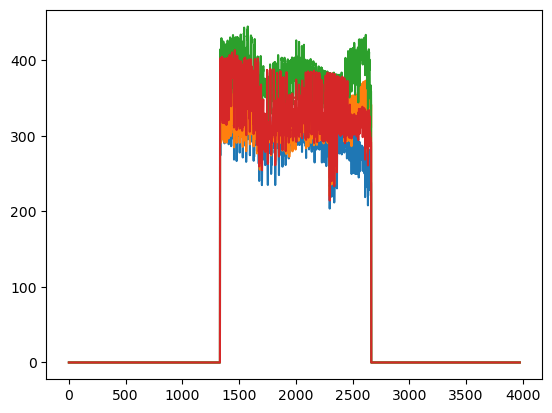

In [75]:
i = 200
j = 22

plt.figure()
for i in range(0, 240, 60):
    plt.plot(X1_[1][0][i, :-100, j].T)
plt.show()

plt.figure()
for i in range(0, 240, 60):
    plt.plot(X2_[1][0][i, :-100, j].T)
plt.show()

plt.figure()
for i in range(0, 240, 60):
    plt.plot(X3_[1][0][i, :-100, j].T)
plt.show()

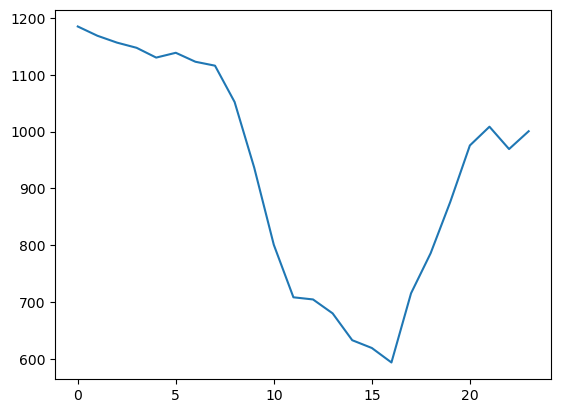

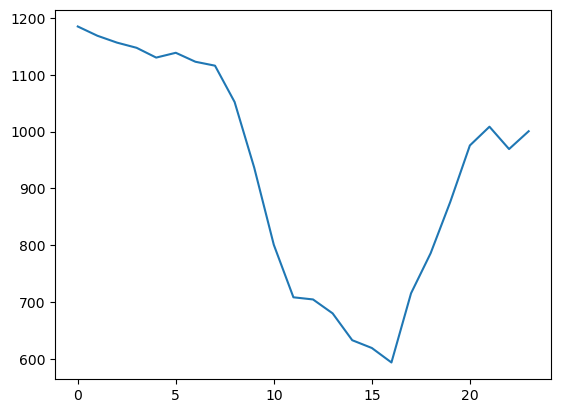

In [14]:
i = 100
plt.figure()
plt.plot(X1_[1][1][i, 2, :].T)
plt.show()

plt.figure()
plt.plot(X3_[1][1][i, 0, :].T)
plt.show()
